In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Python3 code to remove spaces from string
def remove(string):
    return string.replace(" ", "")

# Region information

In [3]:
pickle_in = open("/home/jbaldwin/WorldBank/REGION_MASKS/state_ids.p","rb")
state_ids = pickle.load(pickle_in)
regions = list(state_ids.keys())

regions_sel = ['Eastern Visayas','NCR']

In [4]:
# Load data synthetic
ds = {}
wind = {}
asset = {}
dyear = {}
for reg in regions_sel:
    ds[reg] = xr.open_dataset('/data2/jbaldwin/WINDFIELDS/CHAZ/ERAInterim_WPC/PHI_REGION_METRICS/'+remove(reg)+'.nc')
    wind[reg] = ds[reg].max_wind
    asset[reg] = ds[reg].asset_losses
    dyear[reg] = ds[reg].dyear

In [5]:
# Load data historical
ds_wind_hist = {}
ds_asset_hist = {}
wind_hist = {}
asset_hist = {}
dyear_hist = {}
for reg in regions_sel:
    ds_wind_hist[reg] = xr.open_dataset('/data2/jbaldwin/WINDFIELDS/IBTRACS/PHI/PROVINCE_METRICS/maxwind_'+remove(reg)+'.nc')
    wind_hist[reg] = ds_wind_hist[reg].max_wind
    dyear_hist[reg] = ds_wind_hist[reg].period_years
    ds_asset_hist[reg] = xr.open_dataset('/data2/jbaldwin/WINDFIELDS/IBTRACS/PHI/PROVINCE_METRICS/assetlosses_'+remove(reg)+'.nc')
    asset_hist[reg] = ds_asset_hist[reg].asset_losses


In [6]:
def exceedance(data,dyear,plotattrs,marker,label,linewidth):
    pdfevents,bins = np.histogram(data,np.unique(np.hstack([np.sort(data),data.max()+5]))) # determine frequency in each bin
    cdfevents = 1.*np.cumsum(pdfevents[::-1])[::-1]/dyear # calculate cumulative frequency per year in each bin
    returnP_o = 1./cdfevents # calculate return period (1/f)
    dot, = ax.semilogx(returnP_o[:],bins[:-1],plotattrs,marker=marker,label=label,linewidth=linewidth)

# Plot exceedance curves for maximum wind speed

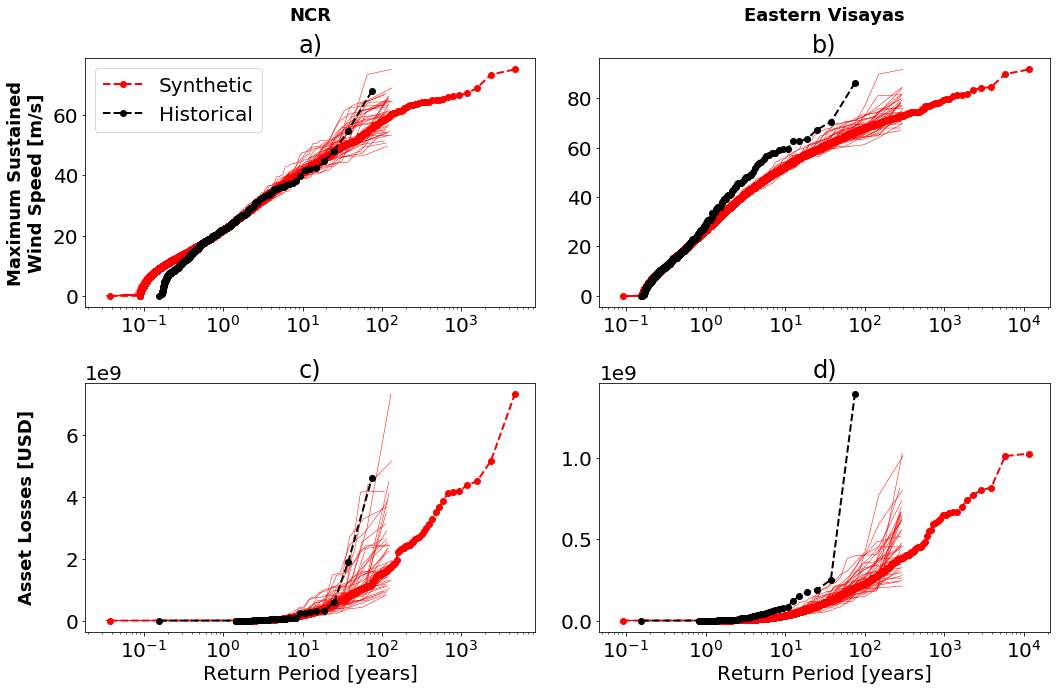

In [31]:
fig = plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 20})

ax = plt.subplot(221)
reg = 'NCR'
for i in np.arange(0,wind[reg].ensembleNum.max().values,1):
    exceedance(wind[reg].sel(ensembleNum=i),dyear[reg].sel(ensembleNum=i).values,'r-','','',0.5)
exceedance(wind[reg].values.ravel(),dyear[reg].sum(dim='ensembleNum').values,'r--','o','Synthetic',2)
exceedance(wind_hist[reg],dyear_hist[reg],'k--','o','Historical',2)
plt.title('a)')
#plt.xlabel('Return Period [years]')
#plt.ylabel('Maximum Sustained Wind Speed\n[m/s]',fontsize = 16)
plt.legend()
ax.text(0.5,1.15,'NCR',fontsize=18,transform=ax.transAxes,fontweight='bold',horizontalalignment='center')
ax.text(-0.13,0.5,'Maximum Sustained\nWind Speed [m/s]',fontsize=18,transform=ax.transAxes,fontweight='bold',verticalalignment='center',rotation='vertical',horizontalalignment='center')

ax = plt.subplot(222)
reg = 'Eastern Visayas'
for i in np.arange(0,wind[reg].ensembleNum.max().values,1):
    exceedance(wind[reg].sel(ensembleNum=i),dyear[reg].sel(ensembleNum=i).values,'r-','','',0.5)
exceedance(wind[reg].values.ravel(),dyear[reg].sum(dim='ensembleNum').values,'r--','o','Synthetic',2)
exceedance(wind_hist[reg],dyear_hist[reg],'k--','o','Historical',2)
plt.title('b)' )
#plt.xlabel('Return Period [years]')
#plt.ylabel('Maximum Sustained Wind Speed\n[m/s]',fontsize = 16)
ax.text(0.5,1.15,'Eastern Visayas',fontsize=18,transform=ax.transAxes,fontweight='bold',horizontalalignment='center')

ax = plt.subplot(223)
reg = 'NCR'
for i in np.arange(0,asset[reg].ensembleNum.max().values,1):
    exceedance(asset[reg].sel(ensembleNum=i),dyear[reg].sel(ensembleNum=i).values,'r-','','',0.5)
exceedance(asset[reg].values.ravel(),dyear[reg].sum(dim='ensembleNum').values,'r--','o','Synthetic',2)
exceedance(asset_hist[reg],dyear_hist[reg],'k--','o','Historical',2)
plt.title('c)')
plt.xlabel('Return Period [years]')
#plt.ylabel('Asset Losses [USD]')
ax.text(-0.13,0.5,'Asset Losses [USD]',fontsize=18,transform=ax.transAxes,fontweight='bold',verticalalignment='center',rotation='vertical',horizontalalignment='center')


ax = plt.subplot(224)
reg = 'Eastern Visayas'
for i in np.arange(0,asset[reg].ensembleNum.max().values,1):
    exceedance(asset[reg].sel(ensembleNum=i),dyear[reg].sel(ensembleNum=i).values,'r-','','',0.5)
exceedance(asset[reg].values.ravel(),dyear[reg].sum(dim='ensembleNum').values,'r--','o','Synthetic',2)
exceedance(asset_hist[reg],dyear_hist[reg],'k--','o','Historical',2)
plt.title('d)')
plt.xlabel('Return Period [years]')
#plt.ylabel('Asset Losses [USD]')

plt.tight_layout()
plt.savefig('FIGURES/exceedance_curves.png',dpi=600)
plt.savefig('FIGURES/exceedance_curves.pdf')

# Plot exceedance curves for asset losses

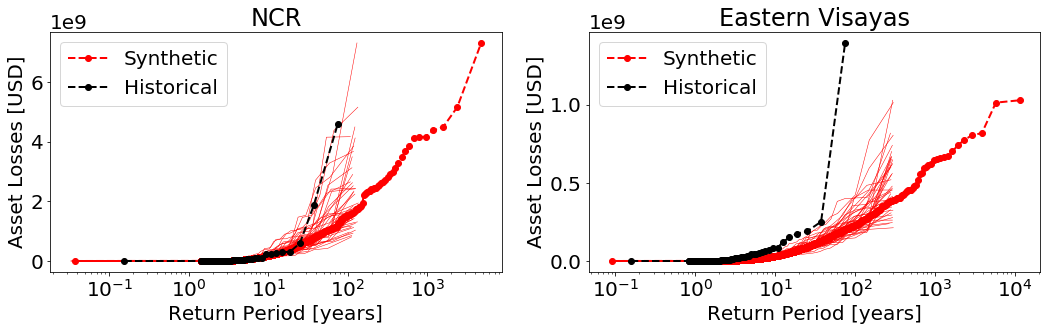

In [72]:
fig = plt.figure(figsize=(15, 5))
plt.rcParams.update({'font.size': 20})

ax = plt.subplot(121)
reg = 'NCR'
for i in np.arange(0,asset[reg].ensembleNum.max().values,1):
    exceedance(asset[reg].sel(ensembleNum=i),dyear[reg].sel(ensembleNum=i).values,'r-','','',0.5)
exceedance(asset[reg].values.ravel(),dyear[reg].sum(dim='ensembleNum').values,'r--','o','Synthetic',2)
exceedance(asset_hist[reg],dyear_hist[reg],'k--','o','Historical',2)
plt.title(reg)
plt.xlabel('Return Period [years]')
plt.ylabel('Asset Losses [USD]')
plt.legend()

ax = plt.subplot(122)
reg = 'Eastern Visayas'
for i in np.arange(0,asset[reg].ensembleNum.max().values,1):
    exceedance(asset[reg].sel(ensembleNum=i),dyear[reg].sel(ensembleNum=i).values,'r-','','',0.5)
exceedance(asset[reg].values.ravel(),dyear[reg].sum(dim='ensembleNum').values,'r--','o','Synthetic',2)
exceedance(asset_hist[reg],dyear_hist[reg],'k--','o','Historical',2)
plt.title(reg)
plt.xlabel('Return Period [years]')
plt.ylabel('Asset Losses [USD]')

plt.legend()
plt.tight_layout()
plt.savefig('FIGURES/asset_losses_exceedance.png',dpi=600)

# OLD EXCEEDANCE CURVES

In [7]:
# Load data synthetic
ds_asset_losses = {}
asset_losses = {}
vector_assets = {}
period_years = {}
for reg in regions_sel:
    ds_asset_losses[reg] = xr.open_dataset('/data2/jbaldwin/WINDFIELDS/CHAZ/ERAInterim_WPC/PHI_PROVINCE_METRICS/wpc0-2_assetlosses_'+regions_nospace[reg]+'.nc')
    asset_losses[reg] = ds_asset_losses[reg].asset_losses
    vector_assets[reg] = np.concatenate(asset_losses[reg])
    period_years[reg] = ds_asset_losses[reg].attrs['period_years']

In [8]:
# Load data historical
ds_asset_losses_hist = {}
asset_losses_hist = {}
period_years_hist = {}
for reg in regions_sel:
    ds_asset_losses_hist[reg] = xr.open_dataset('/data2/jbaldwin/WINDFIELDS/IBTRACS/PHI/PROVINCE_METRICS/assetlosses_'+regions_nospace[reg]+'.nc')
    asset_losses_hist[reg] = ds_asset_losses_hist[reg].asset_losses
    period_years_hist[reg] = ds_asset_losses_hist[reg].attrs['period_years']

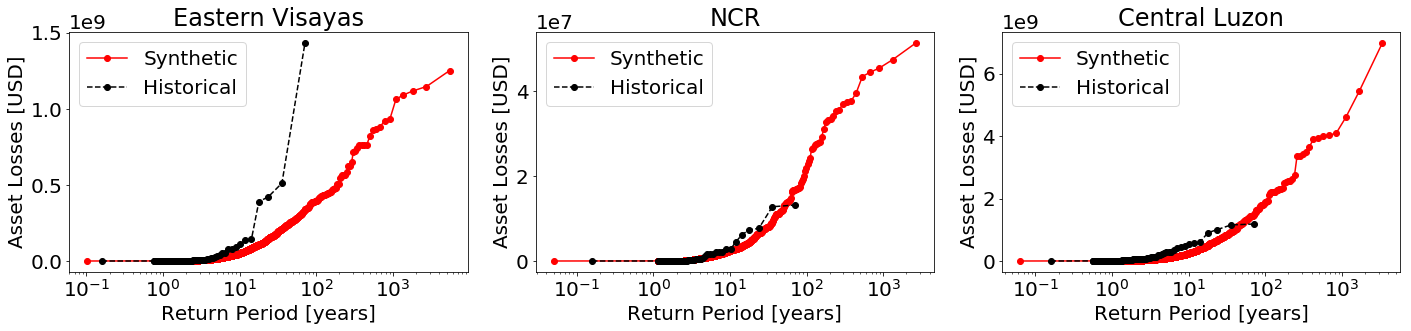

In [9]:
fig = plt.figure(figsize=(20, 5))
plt.rcParams.update({'font.size': 20})

for i in np.arange(3):
    reg = regions_sel[i]
    ax = plt.subplot(1,3,i+1)
    obsw = vector_assets[reg]
    obsy = period_years[reg]
    pdfevents,bins = np.histogram(obsw,np.unique(np.hstack([np.sort(obsw),obsw.max()+5]))) # determine frequency in each bin
    cdfevents = 1.*np.cumsum(pdfevents[::-1])[::-1]/obsy # calculate cumulative frequency per year in each bin
    returnP_o = 1./cdfevents # calculate return period (1/f)
    dot, = ax.semilogx(returnP_o[:],bins[:-1],'r-',marker='o',label='Synthetic')
    
    obsw = asset_losses_hist[reg]
    obsy = period_years_hist[reg]
    pdfevents,bins = np.histogram(obsw,np.unique(np.hstack([np.sort(obsw),obsw.max()+5]))) # determine frequency in each bin
    cdfevents = 1.*np.cumsum(pdfevents[::-1])[::-1]/obsy # calculate cumulative frequency per year in each bin
    returnP_o = 1./cdfevents # calculate return period (1/f)
    dot, = ax.semilogx(returnP_o[:],bins[:-1],'k--',marker='o',label='Historical')
    
    plt.title(reg)
    plt.xlabel('Return Period [years]')
    plt.ylabel('Asset Losses [USD]')
    plt.legend()

plt.tight_layout()

#plt.savefig('FIGURES/asset_losses_exceedance.png',dpi=400)

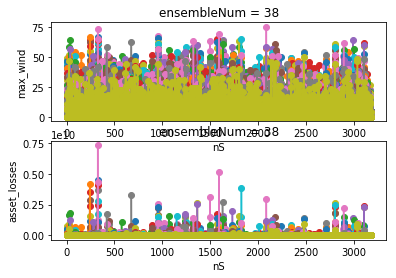

In [4]:
dat = xr.open_dataset('/data2/jbaldwin/WINDFIELDS/CHAZ/ERAInterim_WPC/PHI_REGION_METRICS/NCR.nc')
plt.subplot(212)
for i in range(dat.ensembleNum.max().values):
    dat.sel(ensembleNum=i).asset_losses.plot(marker='o')
plt.subplot(211)
for i in range(dat.ensembleNum.max().values):
    dat.sel(ensembleNum=i).max_wind.plot(marker='o')


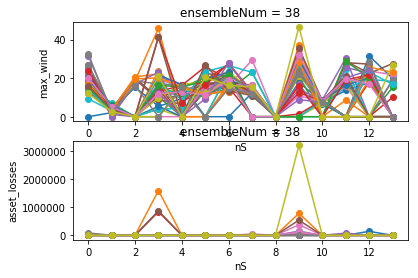

In [6]:
dat = xr.open_dataset('/data2/jbaldwin/WINDFIELDS/CHAZ/ERAInterim_WPC/PHI_REGION_METRICS/OLD/EasternVisayas.nc')
plt.subplot(212)
for i in range(dat.ensembleNum.max().values):
    dat.sel(ensembleNum=i).asset_losses.plot(marker='o')
plt.subplot(211)
for i in range(dat.ensembleNum.max().values):
    dat.sel(ensembleNum=i).max_wind.plot(marker='o')

In [19]:
dat.dyear

<xarray.DataArray 'dyear' (ensembleNum: 40)>
array([0.625, 1.875, 1.875, 1.875, 1.25 , 3.75 , 1.25 , 1.875, 1.875, 1.25 ,
       0.625, 1.875, 1.25 , 0.625, 1.875, 2.5  , 1.25 , 0.625, 1.25 , 1.25 ,
       1.25 , 3.125, 0.625, 0.625, 2.5  , 0.625, 1.25 , 1.875, 0.625, 2.5  ,
       1.875, 0.625, 1.25 , 2.5  , 1.875, 2.5  , 0.625, 1.875, 1.875, 3.125])
Coordinates:
  * ensembleNum  (ensembleNum) int64 0 1 2 3 4 5 6 7 ... 32 33 34 35 36 37 38 39